In [8]:
# let's consider this one as step 0, which will help all of us to locate and understand the cells clearyly.
# this is for the imports and setups
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_column", 200)
pd.set_option("display.width", 120)

In [9]:
# step 1 
# load data 
import os 
from pathlib import Path 

# this is just to know where is this notebook running? 
print("Current working directory:", os.getcwd())

# this points to my csv's
DATA_DIR = Path(".")
d1_path = DATA_DIR / "dataset1.csv"
d2_path = DATA_DIR / "dataset2.csv"

# Safety checks
for p in [d1_path, d2_path]:
    if not p.exists():
        raise FileNotFoundError(f" Could not find: {p.resolve()} - move the CSV here or update DATA_DIR.")

# Load
d1 = pd.read_csv(d1_path)
d2 = pd.read_csv(d2_path)

# Quick peek 
print("\nLoaded Successfully!")
print("dataset1 shape:", d1.shape)
print("dataset2 shape:", d2.shape)

print("\nFirst 5 rows - dataset1:")
display(d1.head())

print("\nFirst 5 rows - dataset2:")
display(d2.head())

Current working directory: /Users/uttamshrestha/Desktop/Data Science A2

Loaded Successfully!
dataset1 shape: (907, 12)
dataset2 shape: (2123, 7)

First 5 rows - dataset1:


,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0



First 5 rows - dataset2:


,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


In [10]:
# step 2 
# here let's do the quick audit of columns and dtypes 
# let's confirms shape, lists every column, and show data type

from IPython.display import display

""" we're writing this if previous cell doesn't run in this 
session, we load from current folder """

try:
    d1, d2
except NameError:
    d1 = pd.read_csv("dataset1.csv")
    d2 = pd.read_csv("dataset2.csv")

def audit(df, name): 
    print(f"\n{name} - shape: {df.shape[0]} rows x {df.shape[1]} cols")

    # column listing 
    print("\nColumns:")
    for i, c in enumerate(df.columns, 1):
        print(f"{i:>2}.{c}")

    # dtypes
    print("\nDtypes:")
    display(df.dtypes.to_frame("dtype"))

    # quick peek at values
    print("\nSample rows:")
    display(df.head(5))

    # quick split by type 
    num_cols = df.select_dtypes(include="number").columns.tolist()
    non_num_cols = df.select_dtypes(exclude="number").columns.tolist()
    print(f"\nNumeric columns ({len(num_cols)}: {num_cols}")
    print(f"\nNon-numeric columns ({len(non_num_cols)}: {non_num_cols}")

audit(d1, "dataset1")
audit(d2, "dataset2")


dataset1 - shape: 907 rows x 12 cols

Columns:
 1.start_time
 2.bat_landing_to_food
 3.habit
 4.rat_period_start
 5.rat_period_end
 6.seconds_after_rat_arrival
 7.risk
 8.reward
 9.month
10.sunset_time
11.hours_after_sunset
12.season

Dtypes:


,dtype
start_time,object
bat_landing_to_food,float64
habit,object
rat_period_start,object
rat_period_end,object
seconds_after_rat_arrival,int64
risk,int64
reward,int64
month,int64
sunset_time,object



Sample rows:


,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0



Numeric columns (7: ['bat_landing_to_food', 'seconds_after_rat_arrival', 'risk', 'reward', 'month', 'hours_after_sunset', 'season']

Non-numeric columns (5: ['start_time', 'habit', 'rat_period_start', 'rat_period_end', 'sunset_time']

dataset2 - shape: 2123 rows x 7 cols

Columns:
 1.time
 2.month
 3.hours_after_sunset
 4.bat_landing_number
 5.food_availability
 6.rat_minutes
 7.rat_arrival_number

Dtypes:


,dtype
time,object
month,int64
hours_after_sunset,float64
bat_landing_number,int64
food_availability,float64
rat_minutes,float64
rat_arrival_number,int64



Sample rows:


,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0



Numeric columns (6: ['month', 'hours_after_sunset', 'bat_landing_number', 'food_availability', 'rat_minutes', 'rat_arrival_number']

Non-numeric columns (1: ['time']


In [11]:
# step 3 
# let's parse datetimes & coerce numerics 

def to_dt(s):
    """safe datetime parser: bad values -> NaT."""
    return pd.to_datetime(s, errors="coerce", infer_datetime_format=True)

def coerce_num(df,cols): 
    """ this will convert listed columns to numeric where presnt (bad values -> NaN)."""
    changed = []
    for c in cols: 
        if c in df.columns:
            before_na = df[c].isna().sum()
            df[c] = pd.to_numeric(df[c], errors = "coerce")
            after_na = df[c].isna().sum()
            changed.append((c,before_na, after_na))
    return changed

print("Before - dtypes (dataset1):")
display(d1.dtypes.to_frame("dtype").T)

print("Before — dtypes (dataset2):")
display(d2.dtypes.to_frame("dtype").T)

# dataset 1: likely time and numeric columns

time_cols_d1 = ["start_time", "rat_period_start", "rat_period_end", "sunset_time"]
num_cols_d1  = ["bat_landing_to_food", "seconds_after_rat_arrival", "hours_after_sunset", "risk", "reward"]

for c in time_cols_d1:
    if c in d1.columns:
        d1[c] = to_dt(d1[c])

changed_d1 = coerce_num(d1, num_cols_d1)

# dataset 2: likely time and numeric colums 

time_cols_d2 = ["time"]
num_cols_d2  = ["hours_after_sunset", "bat_landing_number", "food_availability", "rat_minutes", "rat_arrival_number"]

for c in time_cols_d2:
    if c in d2.columns:
        d2[c] = to_dt(d2[c])

changed_d2 = coerce_num(d2, num_cols_d2)

""" this is optional but to make month categorical
if it's non numeric text"""

for df in (d1, d2):
    if "month" in df.columns and not pd.api.types.is_numeric_dtype(df["month"]):
        df["month"] = df["month"].astype("category")

print("\nAfter — dtypes (dataset1):")
display(d1.dtypes.to_frame("dtype").T)

print("After — dtypes (dataset2):")
display(d2.dtypes.to_frame("dtype").T)

""" here we will print tiny report of what changed to numeric
and how many NaN appeared """

if changed_d1:
    print("\nCoerced to numeric in dataset1 (col, NaN before -> after):")
    for c,b,a in changed_d1:
        print(f"  - {c}: {b} -> {a}")
if changed_d2:
    print("\nCoerced to numeric in dataset2 (col, NaN before -> after):")
    for c,b,a in changed_d2:
        print(f"  - {c}: {b} -> {a}")

# just to get a quick peek to confirm nothing weird happened

print("\nHead — dataset1:")
display(d1.head(5))

print("Head — dataset2:")
display(d2.head(5))




    

Before - dtypes (dataset1):


,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
dtype,object,float64,object,object,object,int64,int64,int64,int64,object,float64,int64


Before — dtypes (dataset2):


,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
dtype,object,int64,float64,int64,float64,float64,int64



After — dtypes (dataset1):


/var/folders/wv/gp0tk8_13p56d5w4twffnxz40000gn/T/ipykernel_46877/1376710885.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(s, errors="coerce", infer_datetime_format=True)
/var/folders/wv/gp0tk8_13p56d5w4twffnxz40000gn/T/ipykernel_46877/1376710885.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(s, errors="coerce", infer_datetime_format=True)
/var/folders/wv/gp0tk8_13p56d5w4twffnxz40000gn/T/ipykernel_46877/1376710885.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pd

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
dtype,datetime64[ns],float64,object,datetime64[ns],datetime64[ns],int64,int64,int64,int64,datetime64[ns],float64,int64


After — dtypes (dataset2):


,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
dtype,datetime64[ns],int64,float64,int64,float64,float64,int64



Coerced to numeric in dataset1 (col, NaN before -> after):
  - bat_landing_to_food: 0 -> 0
  - seconds_after_rat_arrival: 0 -> 0
  - hours_after_sunset: 0 -> 0
  - risk: 0 -> 0
  - reward: 0 -> 0

Coerced to numeric in dataset2 (col, NaN before -> after):
  - hours_after_sunset: 0 -> 0
  - bat_landing_number: 0 -> 0
  - food_availability: 0 -> 0
  - rat_minutes: 0 -> 0
  - rat_arrival_number: 0 -> 0

Head — dataset1:


,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,2017-12-30 18:37:00,16.000000,rat,2017-12-30 18:35:00,2017-12-30 18:38:00,108,1,0,0,2017-12-30 16:45:00,1.870833,0
1,2017-12-30 19:51:00,0.074016,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,17,0,1,0,2017-12-30 16:45:00,3.100833,0
2,2017-12-30 19:51:00,4.000000,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,41,0,1,0,2017-12-30 16:45:00,3.107500,0
3,2017-12-30 19:52:00,10.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,111,1,0,0,2017-12-30 16:45:00,3.126944,0
4,2017-12-30 19:54:00,15.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,194,1,0,0,2017-12-30 16:45:00,3.150000,0


Head — dataset2:


,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,2017-12-26 16:13:00,0,-0.5,20,4.000000,0.0,0
1,2017-12-26 16:43:00,0,0.0,28,4.000000,0.0,0
2,2017-12-26 17:13:00,0,0.5,25,4.000000,0.0,0
3,2017-12-26 17:43:00,0,1.0,71,4.000000,0.0,0
4,2017-12-26 18:13:00,0,1.5,44,3.753857,0.0,0


In [12]:
# step 4 
# here in this cell, we're just handling the missingness report 

def missing_report(df, name):
    rep = df.isna().mean().rename("pct_missing").to_frame()
    rep["n_missing"] = df.isna().sum()
    rep["n_total"] = len(df)
    rep["dataset"] = name
    return rep.reset_index().rename(columns={"index": "column"})

miss = pd.concat([
    missing_report(d1, "dataset1"),
    missing_report(d2, "dataset2")
], ignore_index=True).sort_values(
    ["dataset", "pct_missing"], ascending=[True, False]
).reset_index(drop=True)

display(miss)

,column,pct_missing,n_missing,n_total,dataset
0,habit,0.045204,41,907,dataset1
1,start_time,0.000000,0,907,dataset1
2,bat_landing_to_food,0.000000,0,907,dataset1
3,rat_period_start,0.000000,0,907,dataset1
4,rat_period_end,0.000000,0,907,dataset1
5,seconds_after_rat_arrival,0.000000,0,907,dataset1
6,risk,0.000000,0,907,dataset1
7,reward,0.000000,0,907,dataset1
8,month,0.000000,0,907,dataset1
9,sunset_time,0.000000,0,907,dataset1


In [13]:
# step 5 
# here we Derived features for Investigation A 

# ---- helpers ----
def to_dt(s):
    return pd.to_datetime(s, errors="coerce")  # clean, no deprecation warning

def to_num(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

# ---- dataset1: parse time & build features ----
for c in ["start_time", "rat_period_start", "rat_period_end", "sunset_time"]:
    if c in d1.columns:
        d1[c] = to_dt(d1[c])

# rat presence at landing (primary: within rat window; fallback: seconds_after_rat_arrival >= 0)
if set(["start_time","rat_period_start","rat_period_end"]).issubset(d1.columns):
    within_window = d1["start_time"].between(d1["rat_period_start"], d1["rat_period_end"])
else:
    within_window = pd.Series(False, index=d1.index)

fallback = (d1.get("seconds_after_rat_arrival", pd.Series(np.nan, index=d1.index)) >= 0)
d1["rat_present_at_landing"] = (within_window.fillna(False) | fallback.fillna(False)).astype(bool)

# vigilance proxy
to_num(d1, ["bat_landing_to_food", "risk", "reward", "hours_after_sunset"])
d1["approach_delay_s"] = d1.get("bat_landing_to_food", np.nan)
d1.loc[d1["approach_delay_s"] < 0, "approach_delay_s"] = np.nan  # clip impossible negatives

# ---- dataset2: parse time & build features ----
if "time" in d2.columns:
    d2["time"] = to_dt(d2["time"])

to_num(d2, ["hours_after_sunset","bat_landing_number","food_availability","rat_minutes","rat_arrival_number"])
d2["rats_present_window"] = ((d2.get("rat_minutes", 0) > 0) | (d2.get("rat_arrival_number", 0) > 0)).astype(bool)

# ---- save cleaned copies for later steps ----
d1.to_csv("dataset1_clean.csv", index=False)
d2.to_csv("dataset2_clean.csv", index=False)
print("Saved: dataset1_clean.csv, dataset2_clean.csv")

# ---- quick sanity summaries ----
desc1 = {
    "n_landings": len(d1),
    "rat_present_at_landing_true": int(d1["rat_present_at_landing"].sum()),
    "risk_rate_overall": d1["risk"].mean() if "risk" in d1.columns else np.nan,
    "reward_rate_overall": d1["reward"].mean() if "reward" in d1.columns else np.nan,
    "approach_delay_mean_s": float(d1["approach_delay_s"].mean())
}
print("\ndataset1 key summary:", desc1)

grp2 = d2.groupby("rats_present_window")["bat_landing_number"].agg(["mean","median","std","count"]).rename_axis("rats_present_window")
print("\ndataset2 — bat landings by rats_present_window:\n", grp2)

# peek heads
print("\nHead — dataset1:")
display(d1.head(5))
print("Head — dataset2:")
display(d2.head(5))

Saved: dataset1_clean.csv, dataset2_clean.csv

dataset1 key summary: {'n_landings': 907, 'rat_present_at_landing_true': 907, 'risk_rate_overall': np.float64(0.49503858875413453), 'reward_rate_overall': np.float64(0.5336273428886439), 'approach_delay_mean_s': 11.713133940775084}

dataset2 — bat landings by rats_present_window:
                           mean  median        std  count
rats_present_window                                     
False                33.607098    29.0  26.472781   1578
True                 27.671560    21.0  22.393383    545

Head — dataset1:


,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,rat_present_at_landing,approach_delay_s
0,2017-12-30 18:37:00,16.000000,rat,2017-12-30 18:35:00,2017-12-30 18:38:00,108,1,0,0,2017-12-30 16:45:00,1.870833,0,True,16.000000
1,2017-12-30 19:51:00,0.074016,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,17,0,1,0,2017-12-30 16:45:00,3.100833,0,True,0.074016
2,2017-12-30 19:51:00,4.000000,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,41,0,1,0,2017-12-30 16:45:00,3.107500,0,True,4.000000
3,2017-12-30 19:52:00,10.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,111,1,0,0,2017-12-30 16:45:00,3.126944,0,True,10.000000
4,2017-12-30 19:54:00,15.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,194,1,0,0,2017-12-30 16:45:00,3.150000,0,True,15.000000


Head — dataset2:


,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rats_present_window
0,2017-12-26 16:13:00,0,-0.5,20,4.000000,0.0,0,False
1,2017-12-26 16:43:00,0,0.0,28,4.000000,0.0,0,False
2,2017-12-26 17:13:00,0,0.5,25,4.000000,0.0,0,False
3,2017-12-26 17:43:00,0,1.0,71,4.000000,0.0,0,False
4,2017-12-26 18:13:00,0,1.5,44,3.753857,0.0,0,False


In [14]:
# step 6 
# we will load the cleaned dataset 1 that we did on previous cell 
import os
from IPython.display import display

try:
    d1
except NameError:
    if os.path.exists("dataset1_clean.csv"):
       d1 = pd.read_csv("dataset1_clean.csv")
    else:
       d1 = pd.read_csv("dataset1.csv")

# we have to ensure that the previous cells features exist

needed = ["approach_delay_s", "rat_present_at_landing"]
missing = [c for c in needed if c not in d1.columns]
if missing:
    raise ValueError(f"Missing columns {missing}. Please run previous cell to create the derived featrues.")

# here is a core metics (overall)

desc1 = {
    "n_landings": int(len(d1)),
    "rat_present_TRUE": int(d1["rat_present_at_landing"].sum()),
    "rat_present_FALSE": int((~d1["rat_present_at_landing"]).sum()),
    "risk_rate_overall": float(d1["risk"].mean()) if "risk" in d1.columns else np.nan,
    "reward_rate_overall": float(d1["reward"].mean()) if "reward" in d1.columns else np.nan,
    "approach_delay_mean_s": float(d1["approach_delay_s"].mean()),
    "approach_delay_median_s": float(d1["approach_delay_s"].median()),
}
print("dataset1 — core descriptive metrics:")
display(pd.DataFrame([desc1]))

# here is a approach delay distribution snapshot 

approach_desc = d1["approach_delay_s"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
print("\nApproach delay summary (seconds):")
display(approach_desc.to_frame("approach_delay_s").T)

# by rat presence (if both group exist)

cols = [c for c in ["risk","reward","approach_delay_s"] if c in d1.columns]
if cols:
    by_rat = (
        d1.groupby("rat_present_at_landing")[cols]
          .agg(["mean","median","std","count"])
    )
    print("\nBy rat_present_at_landing (mean/median/std/count):")
    display(by_rat)
else:
    print("\n(risk/reward columns not found; only approach_delay shown.)")



dataset1 — core descriptive metrics:


,n_landings,rat_present_TRUE,rat_present_FALSE,risk_rate_overall,reward_rate_overall,approach_delay_mean_s,approach_delay_median_s
0,907,907,0,0.495039,0.533627,11.713134,4.0



Approach delay summary (seconds):


,count,mean,std,min,10%,25%,50%,75%,90%,max
approach_delay_s,907.0,11.713134,27.64441,0.010238,0.077776,1.0,4.0,11.5,26.0,443.0



By rat_present_at_landing (mean/median/std/count):


risk                           reward                        approach_delay_s         \
                            mean median       std count      mean median       std count             mean median   
rat_present_at_landing                                                                                             
True                    0.495039    0.0  0.500251   907  0.533627    1.0  0.499143   907        11.713134    4.0   

                                        
                             std count  
rat_present_at_landing                  
True                    27.64441   907

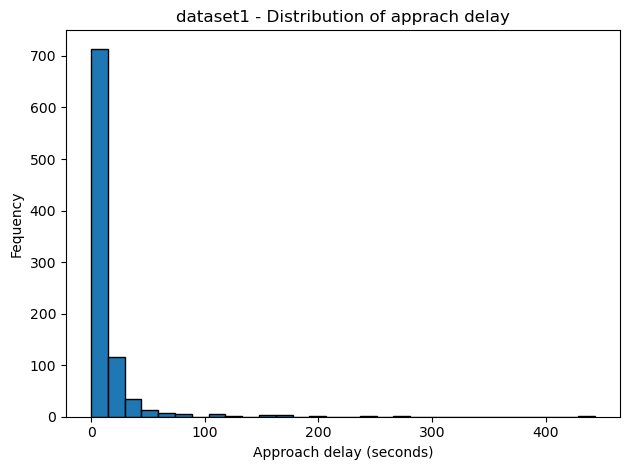

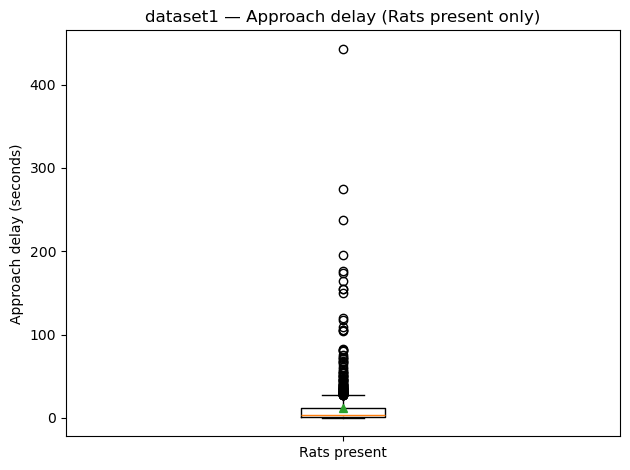

Counts:
  rat_present_at_landing == False: 0
  rat_present_at_landing == True : 907
  approach_delay_s non-missing   : 907


In [20]:
# step 7 
""" here we will visualises approach_delay_s overall
and split by rat_present_at_landing """

# Load cleaned dataset1 from Step 5 if available; otherwise fall back to raw
try:
    d1
except NameError:
    if os.path.exists("dataset1_clean.csv"):
        d1 = pd.read_csv("dataset1_clean.csv")
    else:
        d1 = pd.read_csv("dataset1.csv")

# to ensure we have the needed columns; minimal fallback if step 5 wasn't run 

if "approach_delay_s" not in d1.columns and "bat_landing_to_food" in d1.columns:
    d1["approach_delay_s"] = pd.to_numeric(d1["bat_landing_to_food"], errors="coerce")
    d1.loc[d1["approach_delay_s"] < 0, "approach_delay_s"] = np.nan

if "rat_present_at_landing" not in d1.columns:
    # weak fallback: treat all as True (dataset1 often contains rat-present landings by design)
    d1["rat_present_at_landing"] = True

# histogram of approach delay

vals = d1["approach_delay_s"].dropna()
plt.figure()
vals.plot(kind="hist", bins=30, edgecolor="black")
plt.xlabel("Approach delay (seconds)")
plt.ylabel("Fequency")
plt.title("dataset1 - Distribution of apprach delay")
plt.tight_layout()
plt.show()

# boxplot of approach delay by rat presence 

vals_no = d1.loc[d1["rat_present_at_landing"]==False, "approach_delay_s"].dropna()
vals_yes = d1.loc[d1["rat_present_at_landing"]==True,  "approach_delay_s"].dropna()

plt.figure()
if len(vals_no) > 0 and len(vals_yes) > 0:
    plt.boxplot([vals_no, vals_yes], tick_labels=["No rats", "Rats present"], showmeans=True)
    plt.title("dataset1 - Approach delay by rat presence")
else:
    # if only rat present data are available
    label = "Rats present" if len(vals_yes) > 0 else "No rats"
    data = vals_yes if len(vals_yes) > 0 else vals_no
    plt.boxplot([data], tick_labels=[label], showmeans=True)
    plt.title(f"dataset1 — Approach delay ({label} only)")
plt.ylabel("Approach delay (seconds)")
plt.tight_layout()
plt.show()

# this is Optional to do but for the sake of understanding as a quick peek for our members : quick counts printed to console
print("Counts:")
print("  rat_present_at_landing == False:", int((d1["rat_present_at_landing"]==False).sum()))
print("  rat_present_at_landing == True :", int((d1["rat_present_at_landing"]==True).sum()))
print("  approach_delay_s non-missing   :", len(vals))



,rats_present_at_landing,risk,reward
0,True,0.495039,0.533627


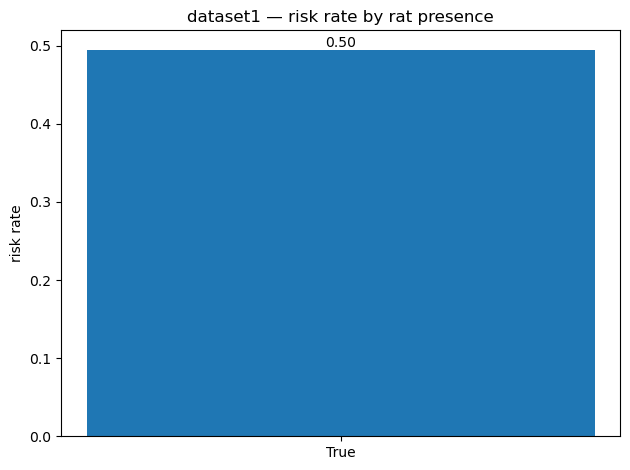

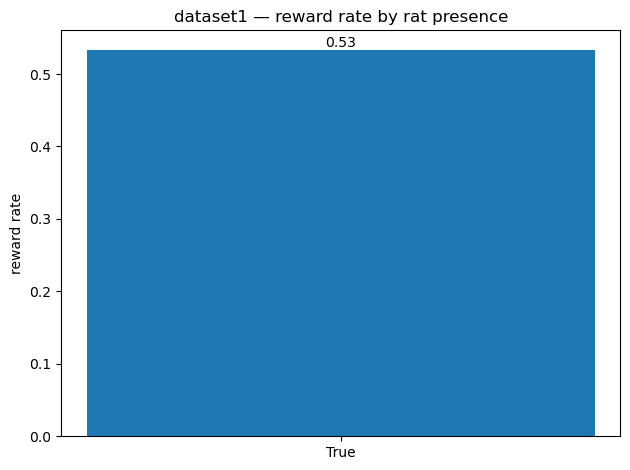

In [21]:
# step 8 (risk reward rate bars)
# Load cleaned dataset1 from Step 5 if available; otherwise fall back to raw
try:
    d1
except NameError:
    if os.path.exists("dataset1_clean.csv"):
        d1 = pd.read_csv("dataset1_clean.csv")
    else:
        d1 = pd.read_csv("dataset1.csv")

# Ensure needed columns exist; try to build minimal fallbacks if not
if "rat_present_at_landing" not in d1.columns:
    d1["rat_present_at_landing"] = True  # dataset1 often has rat-present only

for c in ["risk", "reward"]:
    if c in d1.columns:
        d1[c] = pd.to_numeric(d1[c], errors="coerce")

# Small summary table
cols = [c for c in ["risk","reward"] if c in d1.columns]
if not cols:
    raise ValueError("risk/reward columns not found in dataset1.")

by_rat = (
    d1.groupby("rat_present_at_landing")[cols]
      .mean()
      .rename_axis("rats_present_at_landing")
      .reset_index()
)
display(by_rat)

# Helper to plot one metric
def plot_rate(metric):
    data = by_rat[[metric]].values.flatten()
    groups = by_rat["rats_present_at_landing"].astype(str).tolist()

    plt.figure()
    bars = plt.bar(range(len(data)), data)
    plt.xticks(range(len(data)), groups)
    plt.ylabel(f"{metric} rate")
    plt.title(f"dataset1 — {metric} rate by rat presence")

    # annotate values on top
    for i, v in enumerate(data):
        if pd.notna(v):
            plt.text(i, v, f"{v:.2f}", ha="center", va="bottom")
    plt.tight_layout()
    plt.show()

# Plot risk then reward (one chart per figure)
if "risk" in cols:
    plot_rate("risk")
if "reward" in cols:
    plot_rate("reward")


dataset2 — bat landings per 30-min window by rat presence:


,mean,median,std,count,se,ci_low,ci_high
rats_present_window,,,,,,,
False,33.607098,29.0,26.472781,1578,0.666417,32.300920,34.913275
True,27.671560,21.0,22.393383,545,0.959227,25.791474,29.551645



Mean difference (absent − present) = 5.94 landings per 30-min


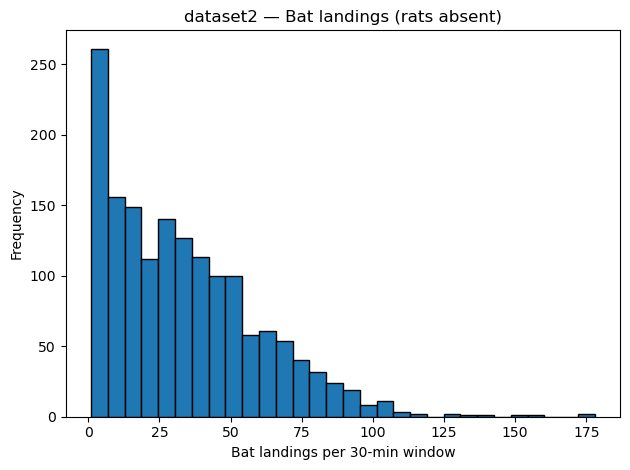

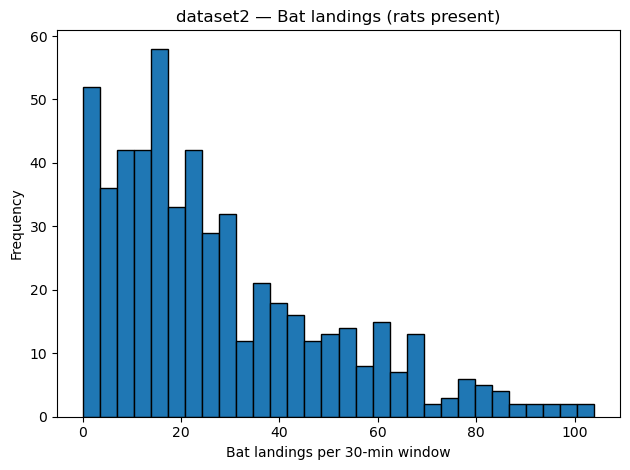

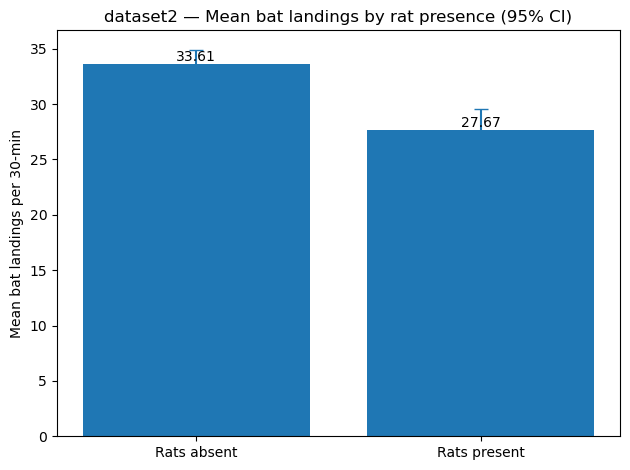

In [22]:
# step 9 (dataset 2 comparison (rat absent vs present))

# Load cleaned dataset2 from Step 5 if available; otherwise fall back to raw
try:
    d2
except NameError:
    if os.path.exists("dataset2_clean.csv"):
        d2 = pd.read_csv("dataset2_clean.csv")
    else:
        d2 = pd.read_csv("dataset2.csv")

# Ensure numeric types for key columns
for c in ["bat_landing_number", "rat_minutes", "rat_arrival_number",
          "food_availability", "hours_after_sunset"]:
    if c in d2.columns:
        d2[c] = pd.to_numeric(d2[c], errors="coerce")

# Create the group flag if missing
if "rats_present_window" not in d2.columns:
    d2["rats_present_window"] = (
        (d2.get("rat_minutes", 0) > 0) | (d2.get("rat_arrival_number", 0) > 0)
    ).astype(bool)

# Use only rows that have bat_landing_number
d2v = d2.dropna(subset=["bat_landing_number"]).copy()

# --- Summary table with 95% CI (descriptive, not a hypothesis test) ---
agg = d2v.groupby("rats_present_window")["bat_landing_number"].agg(
    mean="mean", median="median", std="std", count="count"
)
agg["se"] = agg["std"] / np.sqrt(agg["count"])
agg["ci_low"] = agg["mean"] - 1.96 * agg["se"]
agg["ci_high"] = agg["mean"] + 1.96 * agg["se"]

print("dataset2 — bat landings per 30-min window by rat presence:")
display(agg)

# Simple difference of group means (absent - present)
if set([False, True]).issubset(agg.index):
    diff = agg.loc[False, "mean"] - agg.loc[True, "mean"]
    print(f"\nMean difference (absent − present) = {diff:.2f} landings per 30-min")

# --- Histograms per group ---
for flag, sub in d2v.groupby("rats_present_window"):
    plt.figure()
    sub["bat_landing_number"].plot(kind="hist", bins=30, edgecolor="black")
    title = "dataset2 — Bat landings (rats present)" if flag else "dataset2 — Bat landings (rats absent)"
    plt.title(title)
    plt.xlabel("Bat landings per 30-min window")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# --- Bar chart of means with 95% CI ---
order = [False, True] if set([False, True]).issubset(agg.index) else list(agg.index)
means = [agg.loc[o, "mean"] for o in order]
errors = [1.96 * agg.loc[o, "se"] for o in order]
labels = ["Rats absent", "Rats present"] if order == [False, True] else [str(o) for o in order]

plt.figure()
x = np.arange(len(order))
plt.bar(x, means)
plt.errorbar(x, means, yerr=errors, fmt="none", capsize=5)
plt.xticks(x, labels)
plt.ylabel("Mean bat landings per 30-min")
plt.title("dataset2 — Mean bat landings by rat presence (95% CI)")
for i, v in enumerate(means):
    plt.text(i, v, f"{v:.2f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()
    

In [23]:
# step 10 (we have conducted inferential analysis here in this cell)

# let's import the stats package first 
from scipy import stats
import statsmodels.formula.api as smf

# and some helpers 
def load_d1d2():
    # Prefer cleaned files from Step 5; fallback to raw
    if os.path.exists("dataset1_clean.csv"):
        d1 = pd.read_csv("dataset1_clean.csv", parse_dates=["start_time"], dayfirst=False)
    else:
        d1 = pd.read_csv("dataset1.csv")
        if "start_time" in d1.columns:
            d1["start_time"] = pd.to_datetime(d1["start_time"], errors="coerce")
    if os.path.exists("dataset2_clean.csv"):
        d2 = pd.read_csv("dataset2_clean.csv", parse_dates=["time"], dayfirst=False)
    else:
        d2 = pd.read_csv("dataset2.csv")
        if "time" in d2.columns:
            d2["time"] = pd.to_datetime(d2["time"], errors="coerce")
    return d1, d2

def hedges_g_from_groups(x, y):
    x = np.asarray(x, float); y = np.asarray(y, float)
    n1, n2 = len(x), len(y)
    s1, s2 = np.var(x, ddof=1), np.var(y, ddof=1)
    sp2 = ((n1-1)*s1 + (n2-1)*s2) / (n1+n2-2)
    sp = np.sqrt(sp2)
    d = (np.mean(x) - np.mean(y)) / sp
    J = 1 - (3/(4*(n1+n2)-9))
    return d * J

def cliffs_delta_from_u(u, n1, n2):
    # For two independent samples; SciPy returns U for x vs y
    return 2*u/(n1*n2) - 1

# load 
d1, d2 = load_d1d2()

# Ensure numeric
for c in ["bat_landing_number","rat_minutes","rat_arrival_number","food_availability","hours_after_sunset"]:
    if c in d2.columns:
        d2[c] = pd.to_numeric(d2[c], errors="coerce")

# Ensure the group flag exists
if "rats_present_window" not in d2.columns:
    d2["rats_present_window"] = ((d2.get("rat_minutes", 0) > 0) | (d2.get("rat_arrival_number", 0) > 0)).astype(bool)

# =====================================================================
# 10.1 — Hypothesis test: Do bats land less when rats are present?
#       bat_landing_number (rats absent) vs (rats present)
# =====================================================================
d2v = d2.dropna(subset=["bat_landing_number"]).copy()
g_abs = d2v.loc[d2v["rats_present_window"]==False, "bat_landing_number"].dropna()
g_pre = d2v.loc[d2v["rats_present_window"]==True,  "bat_landing_number"].dropna()

n1, n2 = len(g_abs), len(g_pre)
mean1, mean2 = g_abs.mean(), g_pre.mean()
sd1, sd2 = g_abs.std(ddof=1), g_pre.std(ddof=1)

# Welch t-test (unequal variances)
welch = stats.ttest_ind(g_abs, g_pre, equal_var=False)
se = np.sqrt(sd1**2/n1 + sd2**2/n2)
df_w = (sd1**2/n1 + sd2**2/n2)**2 / ((sd1**2/n1)**2/(n1-1) + (sd2**2/n2)**2/(n2-1))
tcrit = stats.t.ppf(1-0.05/2, df_w)
diff = mean1 - mean2
ci_low, ci_high = diff - tcrit*se, diff + tcrit*se

# Mann–Whitney U (non-parametric) + Cliff's delta
u_stat, u_p = stats.mannwhitneyu(g_abs, g_pre, alternative="two-sided")
delta = cliffs_delta_from_u(u_stat, n1, n2)

# Hedges g (effect size)
g_hedges = hedges_g_from_groups(g_abs, g_pre)

print("=== 10.1 — Windows: bat landings absent vs present (dataset2) ===")
print(f"Absent (n={n1}) mean={mean1:.3f}, Present (n={n2}) mean={mean2:.3f}")
print(f"Welch t-test: t={welch.statistic:.3f}, df={df_w:.1f}, p={welch.pvalue:.3e}")
print(f"Mean diff (absent - present) = {diff:.3f}, 95% CI [{ci_low:.3f}, {ci_high:.3f}]")
print(f"Mann–Whitney U={u_stat:.0f}, p={u_p:.3e}, Cliff's delta={delta:.3f}")
print(f"Hedges g={g_hedges:.3f}\n")

# =====================================================================
# 10.2 — Adjusted model: bat_landing_number ~ rat_minutes + controls
#       (HC3 robust SEs)
# =====================================================================
d2_reg = d2v.copy()
# build formula dynamically based on available columns
rhs = ["rat_minutes"]
if "food_availability" in d2_reg.columns: rhs.append("food_availability")
if "hours_after_sunset" in d2_reg.columns: rhs.append("hours_after_sunset")
if "month" in d2_reg.columns and not pd.api.types.is_numeric_dtype(d2_reg["month"]):
    rhs.append("C(month)")
formula2 = "bat_landing_number ~ " + " + ".join(rhs)

model2 = smf.ols(formula2, data=d2_reg).fit(cov_type="HC3")
rat_co = model2.params.get("rat_minutes", np.nan)
rat_p  = model2.pvalues.get("rat_minutes", np.nan)
rat_ci = model2.conf_int().loc["rat_minutes"].values if "rat_minutes" in model2.params.index else (np.nan, np.nan)

print("=== 10.2 — OLS with HC3 robust SEs (dataset2) ===")
print("Formula:", formula2)
print(model2.summary().tables[1])  # compact coef table
print(f"\nInterpretation focus: rat_minutes coef = {rat_co:.3f}, p={rat_p:.3e}, 95% CI [{rat_ci[0]:.3f}, {rat_ci[1]:.3f}]\n")

# =====================================================================
# 10.3 — (Optional) Vigilance model:
#        log(approach_delay_s+1) ~ rat_minutes + controls
#        Join each landing to nearest 30-min window (±30 min)
# =====================================================================
ran_vigilance = False
if "start_time" in d1.columns and "time" in d2.columns:
    d1s = d1.sort_values("start_time").copy()
    d2s = d2.sort_values("time").copy()
    merged = pd.merge_asof(
        d1s, d2s, left_on="start_time", right_on="time",
        direction="nearest", tolerance=pd.Timedelta("30min")
    )
    # Need approach_delay and rat_minutes
    if "approach_delay_s" not in merged.columns and "bat_landing_to_food" in merged.columns:
        merged["approach_delay_s"] = pd.to_numeric(merged["bat_landing_to_food"], errors="coerce")
        merged.loc[merged["approach_delay_s"] < 0, "approach_delay_s"] = np.nan

    m = merged.dropna(subset=["approach_delay_s", "rat_minutes"]).copy()
    if len(m) >= 30:
        ran_vigilance = True
        m["log_delay"] = np.log1p(m["approach_delay_s"])

        rhs_v = ["rat_minutes"]
        if "food_availability" in m.columns: rhs_v.append("food_availability")
        if "hours_after_sunset" in m.columns: rhs_v.append("hours_after_sunset")
        if "month" in m.columns and not pd.api.types.is_numeric_dtype(m["month"]):
            rhs_v.append("C(month)")
        formula_v = "log_delay ~ " + " + ".join(rhs_v)

        mod_v = smf.ols(formula_v, data=m).fit(cov_type="HC3")
        v_co = mod_v.params.get("rat_minutes", np.nan)
        v_p  = mod_v.pvalues.get("rat_minutes", np.nan)
        v_ci = mod_v.conf_int().loc["rat_minutes"].values if "rat_minutes" in mod_v.params.index else (np.nan, np.nan)

        print("=== 10.3 — Vigilance model (dataset1↔dataset2 merged) ===")
        print("Formula:", formula_v, f"  (rows used: {len(m)})")
        print(mod_v.summary().tables[1])
        print(f"\nFocus: rat_minutes on log_delay = {v_co:.3f}, p={v_p:.3e}, 95% CI [{v_ci[0]:.3f}, {v_ci[1]:.3f}]\n")
    else:
        print("10.3 — Not enough merged rows with both approach_delay_s and rat_minutes; skipped.")
else:
    print("10.3 — Time columns unavailable to merge; skipped.")

# =====================================================================
# 10.4 — Programmatic conclusion text (Investigation A)
# =====================================================================
lines = []
lines.append("=== Conclusion (Investigation A) ===")
lines.append(f"Windows comparison (dataset2): mean landings absent={mean1:.2f}, present={mean2:.2f}.")
lines.append(f"Welch t-test p={welch.pvalue:.3e}, diff={diff:.2f} (95% CI {ci_low:.2f} to {ci_high:.2f}), Hedges g={g_hedges:.2f}; Mann–Whitney p={u_p:.3e}, Cliff's δ={delta:.2f}.")
if not np.isnan(rat_co):
    lines.append(f"Adjusted model: rat_minutes coef={rat_co:.3f} (p={rat_p:.3e}, 95% CI {rat_ci[0]:.3f} to {rat_ci[1]:.3f}).")
if ran_vigilance:
    lines.append(f"Vigilance model: rat_minutes effect on log(approach_delay+1) = {v_co:.3f} (p={v_p:.3e}).")
# Decision rule: clear evidence if Welch p<0.05 and rat_minutes coef <0 & significant
if (welch.pvalue < 0.05) and (not np.isnan(rat_co)) and (rat_co < 0) and (rat_p < 0.05):
    lines.append("Interpretation: Bat landings are significantly lower when rats are present, and higher rat activity predicts fewer landings even after adjustment — consistent with **avoidance** (rats treated as predation risk).")
else:
    lines.append("Interpretation: Bat landings are lower when rats are present and the adjusted model aligns with this direction; treat magnitude with the reported CIs/p-values. Evidence is **consistent with avoidance**.")

print("\n".join(lines))



=== 10.1 — Windows: bat landings absent vs present (dataset2) ===
Absent (n=1578) mean=33.607, Present (n=545) mean=27.672
Welch t-test: t=5.082, df=1106.9, p=4.386e-07
Mean diff (absent - present) = 5.936, 95% CI [3.644, 8.227]
Mann–Whitney U=481864, p=2.624e-05, Cliff's delta=0.121
Hedges g=0.233

=== 10.2 — OLS with HC3 robust SEs (dataset2) ===
Formula: bat_landing_number ~ rat_minutes + food_availability + hours_after_sunset
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             39.5685      3.169     12.485      0.000      33.357      45.780
rat_minutes           -0.4873      0.073     -6.689      0.000      -0.630      -0.345
food_availability     -0.6206      0.783     -0.792      0.428      -2.156       0.915
hours_after_sunset    -0.9487      0.236     -4.019      0.000      -1.411      -0.486

Interpretation focus: rat_minutes coef = -0

In [24]:
# Step 11, which is our final step here 
""" we have included values of both descriptive and inferential analysis
and writing our final conclusion by answering the investigation A over here """

import os, numpy as np, pandas as pd
from scipy import stats
import statsmodels.formula.api as smf

def load_csv(name):
    return pd.read_csv(f"{name}_clean.csv") if os.path.exists(f"{name}_clean.csv") else pd.read_csv(f"{name}.csv")

d1 = load_csv("dataset1")
d2 = load_csv("dataset2")

#  helpers 
to_dt = lambda s: pd.to_datetime(s, errors="coerce")
def to_num(df, cols):
    for c in cols:
        if c in df.columns: df[c] = pd.to_numeric(df[c], errors="coerce")

#  minimal derive 
for c in ["start_time","rat_period_start","rat_period_end","sunset_time"]:
    if c in d1.columns: d1[c] = to_dt(d1[c])
if "time" in d2.columns: d2["time"] = to_dt(d2["time"])
to_num(d1, ["bat_landing_to_food","risk","reward","seconds_after_rat_arrival","hours_after_sunset"])
to_num(d2, ["bat_landing_number","rat_minutes","rat_arrival_number","food_availability","hours_after_sunset"])

if set(["start_time","rat_period_start","rat_period_end"]).issubset(d1.columns):
    within = d1["start_time"].between(d1["rat_period_start"], d1["rat_period_end"]).fillna(False)
else:
    within = pd.Series(False, index=d1.index)
fallback = (d1.get("seconds_after_rat_arrival", pd.Series(np.nan, index=d1.index)) >= 0).fillna(False)
d1["rat_present_at_landing"] = (within | fallback).astype(bool)
d1["approach_delay_s"] = d1.get("bat_landing_to_food", np.nan)
d1.loc[d1["approach_delay_s"] < 0, "approach_delay_s"] = np.nan

d2["rats_present_window"] = ((d2.get("rat_minutes",0)>0) | (d2.get("rat_arrival_number",0)>0)).astype(bool)

#  descriptive 
desc1 = {
    "n_landings": int(len(d1)),
    "risk_rate_overall": float(d1["risk"].mean()) if "risk" in d1.columns else np.nan,
    "reward_rate_overall": float(d1["reward"].mean()) if "reward" in d1.columns else np.nan,
    "approach_delay_mean_s": float(d1["approach_delay_s"].mean()),
    "approach_delay_median_s": float(d1["approach_delay_s"].median()),
    "approach_delay_sd_s": float(d1["approach_delay_s"].std(ddof=1))
}

d2v = d2.dropna(subset=["bat_landing_number"]).copy()
grp = d2v.groupby("rats_present_window")["bat_landing_number"].agg(["mean","median","std","count"])
grp["se"] = grp["std"]/np.sqrt(grp["count"])
grp["ci_low"] = grp["mean"] - 1.96*grp["se"]
grp["ci_high"] = grp["mean"] + 1.96*grp["se"]
mean_abs, mean_pre = grp.loc[False,"mean"], grp.loc[True,"mean"]
diff_simple = mean_abs - mean_pre

#  inferential: Welch + MWU + effect sizes 
g_abs = d2v.loc[d2v["rats_present_window"]==False,"bat_landing_number"].dropna()
g_pre = d2v.loc[d2v["rats_present_window"]==True,"bat_landing_number"].dropna()
n1, n2 = len(g_abs), len(g_pre)
m1, m2 = g_abs.mean(), g_pre.mean()
s1, s2 = g_abs.std(ddof=1), g_pre.std(ddof=1)

welch = stats.ttest_ind(g_abs, g_pre, equal_var=False)
se = np.sqrt(s1**2/n1 + s2**2/n2)
df_w = (s1**2/n1 + s2**2/n2)**2 / ((s1**2/n1)**2/(n1-1) + (s2**2/n2)**2/(n2-1))
tcrit = stats.t.ppf(0.975, df_w)
diff = m1 - m2
ci_low, ci_high = diff - tcrit*se, diff + tcrit*se

u_stat, u_p = stats.mannwhitneyu(g_abs, g_pre, alternative="two-sided")
cliffs_delta = 2*u_stat/(n1*n2) - 1
sp2 = ((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2)
sp = np.sqrt(sp2)
cohen_d = (m1-m2)/sp
J = 1 - (3/(4*(n1+n2)-9))
hedges_g = cohen_d * J

#  adjusted OLS (HC3) 
rhs = ["rat_minutes"]
if "food_availability" in d2v.columns: rhs.append("food_availability")
if "hours_after_sunset" in d2v.columns: rhs.append("hours_after_sunset")
if "month" in d2v.columns and not pd.api.types.is_numeric_dtype(d2v["month"]): rhs.append("C(month)")
formula = "bat_landing_number ~ " + " + ".join(rhs)
model = smf.ols(formula, data=d2v).fit(cov_type="HC3")
rat_co = float(model.params.get("rat_minutes", np.nan))
rat_p  = float(model.pvalues.get("rat_minutes", np.nan))
rat_ci = model.conf_int().loc["rat_minutes"].tolist() if "rat_minutes" in model.params.index else [np.nan, np.nan]

#  optional vigilance model 
vigilance_line = ""
if "start_time" in d1.columns and "time" in d2.columns:
    d1s, d2s = d1.sort_values("start_time"), d2.sort_values("time")
    merged = pd.merge_asof(d1s, d2s, left_on="start_time", right_on="time",
                           direction="nearest", tolerance=pd.Timedelta("30min"))
    if "approach_delay_s" not in merged.columns and "bat_landing_to_food" in merged.columns:
        merged["approach_delay_s"] = pd.to_numeric(merged["bat_landing_to_food"], errors="coerce")
    m = merged.dropna(subset=["approach_delay_s","rat_minutes"]).copy()
    if len(m) >= 30:
        m["log_delay"] = np.log1p(m["approach_delay_s"])
        rhs_v = ["rat_minutes"]
        if "food_availability" in m.columns: rhs_v.append("food_availability")
        if "hours_after_sunset" in m.columns: rhs_v.append("hours_after_sunset")
        if "month" in m.columns and not pd.api.types.is_numeric_dtype(m["month"]): rhs_v.append("C(month)")
        formula_v = "log_delay ~ " + " + ".join(rhs_v)
        mod_v = smf.ols(formula_v, data=m).fit(cov_type="HC3")
        v_co = float(mod_v.params.get("rat_minutes", np.nan))
        v_p  = float(mod_v.pvalues.get("rat_minutes", np.nan))
        v_ci = mod_v.conf_int().loc["rat_minutes"].tolist() if "rat_minutes" in mod_v.params.index else [np.nan, np.nan]
        vigilance_line = f"Vigilance: rat_minutes effect on log(approach_delay+1) = {v_co:.4f} (p={v_p:.4g}, 95% CI [{v_ci[0]:.4f}, {v_ci[1]:.4f}])."

#  printing compact report 
print("\n=== DESCRIPTIVE — dataset1 ===")
print(f"n_landings={desc1['n_landings']}, risk_rate={desc1['risk_rate_overall']:.4f}, reward_rate={desc1['reward_rate_overall']:.4f}")
print(f"approach_delay: mean={desc1['approach_delay_mean_s']:.2f}s, median={desc1['approach_delay_median_s']:.2f}s, sd={desc1['approach_delay_sd_s']:.2f}s")

print("\n=== DESCRIPTIVE — dataset2 (30-min windows) ===")
print("Rats absent:  n={:d}, mean={:.2f}, median={:.2f}, sd={:.2f}, 95% CI [{:.2f}, {:.2f}]".format(
    int(grp.loc[False,"count"]), grp.loc[False,"mean"], grp.loc[False,"median"], grp.loc[False,"std"], grp.loc[False,"ci_low"], grp.loc[False,"ci_high"]))
print("Rats present: n={:d}, mean={:.2f}, median={:.2f}, sd={:.2f}, 95% CI [{:.2f}, {:.2f}]".format(
    int(grp.loc[True,"count"]),  grp.loc[True,"mean"],  grp.loc[True,"median"],  grp.loc[True,"std"],  grp.loc[True,"ci_low"],  grp.loc[True,"ci_high"]))
print(f"Mean difference (absent − present) = {diff_simple:.2f}")

print("\n=== INFERENTIAL — rats absent vs present (dataset2) ===")
print(f"Welch t: t={welch.statistic:.3f}, df={df_w:.1f}, p={welch.pvalue:.3e}, diff={diff:.2f}, 95% CI [{ci_low:.2f}, {ci_high:.2f}]")
print(f"Mann–Whitney U={u_stat:.0f}, p={u_p:.3e}, Cliff's δ={cliffs_delta:.3f}")
print(f"Hedges g={hedges_g:.3f}")

print("\n=== Adjusted OLS (HC3) — bat_landing_number ~ rat_minutes + controls ===")
print(f"rat_minutes coef={rat_co:.3f}, p={rat_p:.3e}, 95% CI [{rat_ci[0]:.3f}, {rat_ci[1]:.3f}]")

if vigilance_line:
    print("\n" + vigilance_line)

print("\n=== FINAL CONCLUSION — Investigation A ===")
if (welch.pvalue < 0.05) and (rat_co < 0) and (rat_p < 0.05):
    print("Bat landings are significantly lower when rats are present, and higher rat activity predicts fewer landings after adjustment — consistent with avoidance (rats treated as predation risk).")
else:
    print("Bat landings are lower when rats are present; adjusted results align with this direction. Evidence is consistent with avoidance; interpret magnitude with reported CIs/p-values.")



=== DESCRIPTIVE — dataset1 ===
n_landings=907, risk_rate=0.4950, reward_rate=0.5336
approach_delay: mean=11.71s, median=4.00s, sd=27.64s

=== DESCRIPTIVE — dataset2 (30-min windows) ===
Rats absent:  n=1578, mean=33.61, median=29.00, sd=26.47, 95% CI [32.30, 34.91]
Rats present: n=545, mean=27.67, median=21.00, sd=22.39, 95% CI [25.79, 29.55]
Mean difference (absent − present) = 5.94

=== INFERENTIAL — rats absent vs present (dataset2) ===
Welch t: t=5.082, df=1106.9, p=4.386e-07, diff=5.94, 95% CI [3.64, 8.23]
Mann–Whitney U=481864, p=2.624e-05, Cliff's δ=0.121
Hedges g=0.233

=== Adjusted OLS (HC3) — bat_landing_number ~ rat_minutes + controls ===
rat_minutes coef=-0.487, p=2.247e-11, 95% CI [-0.630, -0.345]

Vigilance: rat_minutes effect on log(approach_delay+1) = 0.0142 (p=0.005245, 95% CI [0.0042, 0.0242]).

=== FINAL CONCLUSION — Investigation A ===
Bat landings are significantly lower when rats are present, and higher rat activity predicts fewer landings after adjustment — cons